# Assignment 2 Exploration of the Central Limit Theorem and Hypothesis Testing

## Name:
## ID:

**Task 1: Simulation of CLT**

Use a skewed distribution (e.g., log-normal, chi-squared, or Poisson distribution) to simulate the CLT.
Generate multiple sets of samples with increasing sizes (e.g., 30, 100, 500, 1000).
For each set, calculate and plot the distribution of sample means.
Analyze how the sample mean and variance converge as the sample size increases.

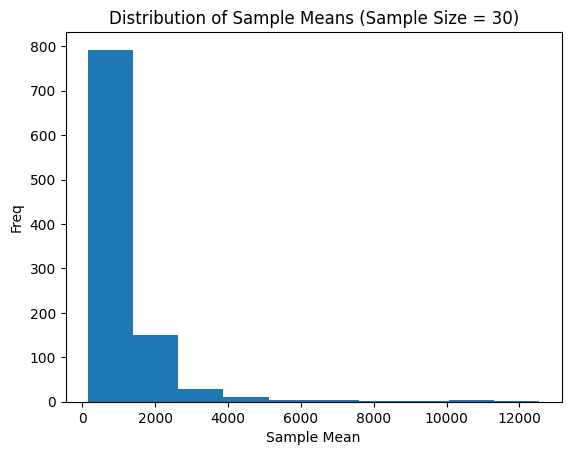

Sample size: 30
Convergence of sample mean: 1229.5709
Convergence of sample variance: 244410224.3571


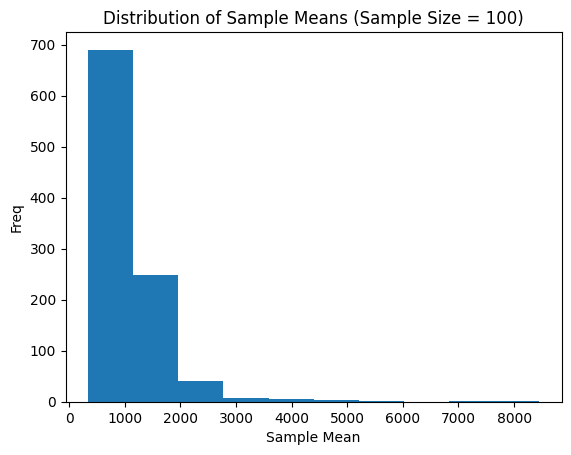

Sample size: 100
Convergence of sample mean: 692.4586
Convergence of sample variance: 300923741.7863


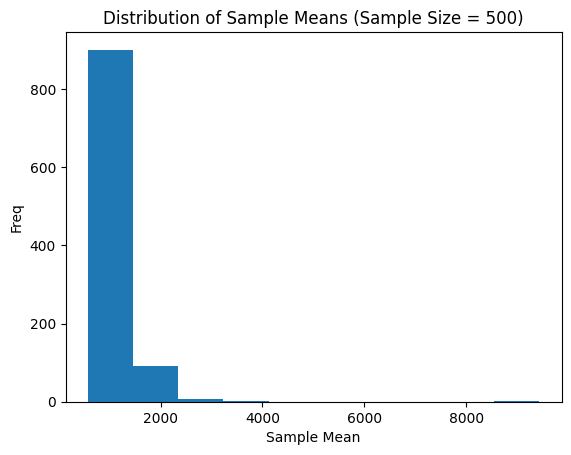

Sample size: 500
Convergence of sample mean: 406.2573
Convergence of sample variance: 1083410619.5541


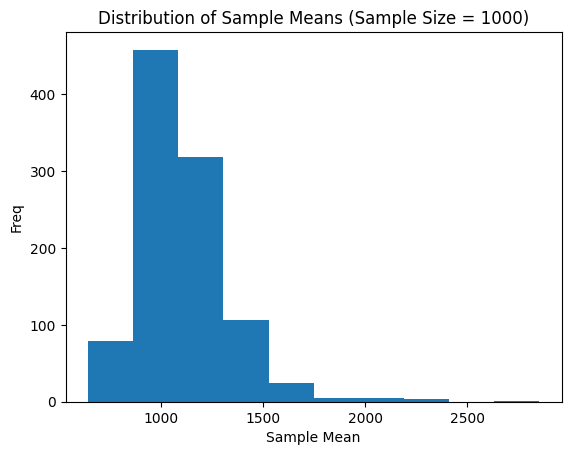

Sample size: 1000
Convergence of sample mean: 221.5760
Convergence of sample variance: 123232683.3040


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate the CLT with a skewed distribution (e.g., log-normal)
# TODO: Generate samples from a log-normal distribution
# Hint: Use np.random.lognormal(mean, sigma, sample_size)

# TODO: Write a function to simulate drawing samples and computing their means
def simulate_clt(sample_size, num_samples):
    # Your code here
    samples = np.random.lognormal(mean=5, sigma=2,size=(num_samples, sample_size))

    # Calculate sample means
    sample_means = np.mean(samples, axis=1)

    # Calculate sample variances
    sample_variances = np.var(samples, axis=1)

    return sample_means, sample_variances




# TODO: Call the function with different sample sizes and plot the results
# Hint: Use plt.hist() for plotting

# Sample sizes to consider
sample_sizes = [30, 100, 500, 1000]

for sample_size in sample_sizes:
    sample_means, sample_variances= simulate_clt(sample_size, num_samples=1000)
    plt.hist(sample_means)
    plt.xlabel('Sample Mean')
    plt.ylabel('Freq')
    plt.title(f'Distribution of Sample Means (Sample Size = {sample_size})')

    plt.show()
    
    # Analyze the convergence of sample mean and variance
    mean_convergence = np.std(sample_means)
    variance_convergence = np.std(sample_variances)

    print(f"Sample size: {sample_size}")
    print(f"Convergence of sample mean: {mean_convergence:.4f}")
    print(f"Convergence of sample variance: {variance_convergence:.4f}")



**Task 2: Hypothesis Testing Using CLT**

Formulate a hypothesis about the population mean based on your simulated data.
Perform a hypothesis test to evaluate this claim at different significance levels.
Explain the impact of sample size on the power of the hypothesis test.

In [2]:
from scipy import stats
import numpy as np
import scipy.stats as stats


# TODO: Formulate a hypothesis about the population mean
# Example hypothesis: "The population mean is X"

# Simulate CLT data
sample_size = 1000
samples = np.random.lognormal(mean=5, sigma=2, size=sample_size)

# Formulate the hypothesis
hypothesis_mean = 5


# TODO: Perform a hypothesis test
# Hint: You might use stats.ttest_1samp()

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(samples, hypothesis_mean)



# TODO: Analyze the p-value and the test statistic

print("Hypothesis:", f"The population mean is {hypothesis_mean}")
print("Test statistic:", t_statistic)
print("P-value:", p_value)

# Analyze the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is sufficient evidence to conclude that the population mean is different from the hypothesized value.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the population mean is different from the hypothesized value.")

#---------- Analyze the effect of sample size on power---------

# Simulate smaller sample size and repeat the hypothesis test
smaller_sample_size = 100
smaller_samples = np.random.lognormal(mean=5, sigma=2, size=smaller_sample_size)

smaller_t_statistic, smaller_p_value = stats.ttest_1samp(smaller_samples, hypothesis_mean)

print("Sample size:", smaller_sample_size)
print("Test statistic:", smaller_t_statistic)
print("P-value:", smaller_p_value)

# Compare p-values
print("Comparison of p-values:")
print("Large sample size:", p_value)
print("Small sample size:", smaller_p_value)

# Analyze the impact of sample size on power
if p_value < smaller_p_value:
    print("Larger sample size has higher power to reject the null hypothesis.")
else:
    print("Smaller sample size has higher power to reject the null hypothesis.")


Hypothesis: The population mean is 5
Test statistic: 7.715108015239382
P-value: 2.91904852982382e-14
Reject the null hypothesis. There is sufficient evidence to conclude that the population mean is different from the hypothesized value.
Sample size: 100
Test statistic: 3.3144509188624967
P-value: 0.0012837844232791568
Comparison of p-values:
Large sample size: 2.91904852982382e-14
Small sample size: 0.0012837844232791568
Larger sample size has higher power to reject the null hypothesis.


**Task3: Real-World Data Analysis**

Find a real-world dataset (e.g., economic, health, social sciences) with a non-normal distribution.
Use CLT to justify using parametric tests for hypothesis testing on this dataset.
Perform at least two different hypothesis tests (e.g., t-test, ANOVA) and interpret the results.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



# TODO: Load a real-world dataset
# Hint: You can use pandas to load data from a CSV, Excel, or other file types

# Load the Titanic dataset from seaborn
titanic_data = sns.load_dataset("titanic")
titanic_data.head(5)
# TODO: Perform hypothesis testing on the dataset
# Hint: You might perform a t-test or ANOVA depending on your hypothesis

#------------- Perform hypothesis testing using t-test------------------
# Compare the age of male and female passengers
male_age = titanic_data.loc[titanic_data['sex'] == 'male', 'age'].dropna()
female_age = titanic_data.loc[titanic_data['sex'] == 'female', 'age'].dropna()

t_stat, p_value = stats.ttest_ind(male_age, female_age)
print("t_stat",t_stat)
print("p_value",p_value)
# Interpret the t-test results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


#---------- Perform hypothesis testing using ANOVA--------------------------

# Compare the fare across different passenger classes
class_1_fare = titanic_data.loc[titanic_data['class'] == 'First', 'fare'].dropna()
class_2_fare = titanic_data.loc[titanic_data['class'] == 'Second', 'fare'].dropna()
class_3_fare = titanic_data.loc[titanic_data['class'] == 'Third', 'fare'].dropna()
f_stat, p_value = stats.f_oneway(class_1_fare, class_2_fare, class_3_fare)
# Interpret the ANOVA results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")



t_stat 2.499206354920835
p_value 0.012671296797013709
Reject the null hypothesis
Reject the null hypothesis


**Task 4: Comparing Two Distributions**
Simulate or use real data to create two different distributions (e.g., one normal and one non-normal).
Draw random samples from these populations and compare their sample means using CLT.
Conduct a comparative analysis and discuss under what conditions the CLT holds for different types of distributions.

Sample mean (normal distribution): 50.70436012196298
Sample mean (non-normal distribution): 21.254508123280125


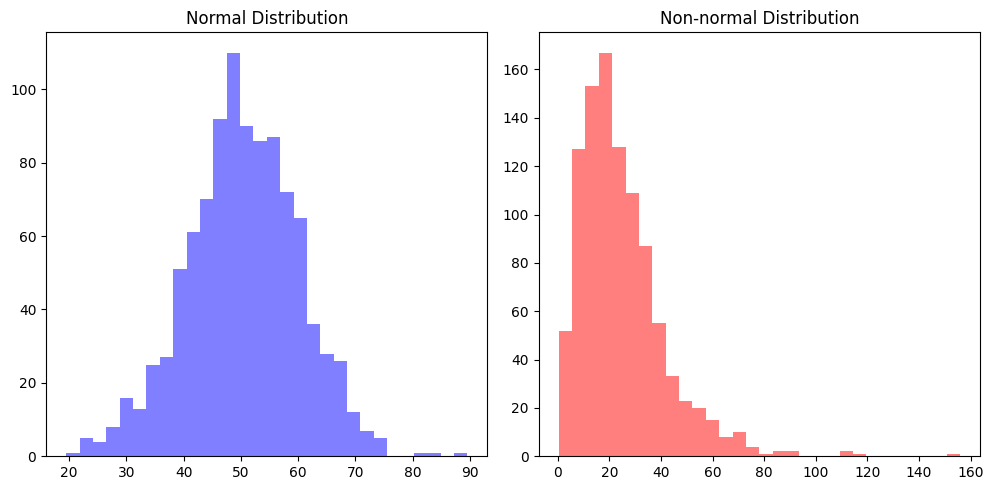

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Generate or use real data to create two different distributions

# Generate a normal distribution
np.random.seed(1)  # Set seed for reproducibility
mean_normal = 50
std_normal = 10
size_normal = 1000
normal_data = np.random.normal(mean_normal, std_normal, size_normal)

# Generate a non-normal distribution
np.random.seed(2)  # Set seed for reproducibility
shape_nonnormal = 2.5
scale_nonnormal = 10
size_nonnormal = 1000
nonnormal_data = np.random.gamma(shape_nonnormal, scale_nonnormal, size_nonnormal)


# TODO: Draw samples and compare their means
# Hint: Use the CLT for comparison

# Draw random samples from the distributions
sample_size = 30
sample_normal = np.random.choice(normal_data, sample_size)
sample_nonnormal = np.random.choice(nonnormal_data, sample_size)


# TODO: Conduct a comparative analysis and discuss your findings


# Compare the sample means using CLT
sample_mean_normal = np.mean(sample_normal)
sample_mean_nonnormal = np.mean(sample_nonnormal)

# Conduct a comparative analysis
print("Sample mean (normal distribution):", sample_mean_normal)
print("Sample mean (non-normal distribution):", sample_mean_nonnormal)

# Plot the distributions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(normal_data, bins=30, alpha=0.5, color='blue')
plt.title("Normal Distribution")

plt.subplot(1, 2, 2)
plt.hist(nonnormal_data, bins=30, alpha=0.5, color='red')
plt.title("Non-normal Distribution")

plt.tight_layout()
plt.show()


**Submission Guidelines:**

Submit a detailed report including all code, plots, and a thorough analysis of the results.
The report should demonstrate a clear understanding of the CLT, hypothesis testing, and data analysis.